<a href="https://colab.research.google.com/github/harshinirhsv/Twitter-Sentiment-Analysis/blob/main/Twitter_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#LOAD LIBRARIES AND DATA
import numpy as np
import pandas as pd
import seaborn as sns
import re 
import matplotlib.pyplot as plt
import warnings
import string
import nltk

pd.set_option("display.max_colwidth",200)
warnings.filterwarnings("ignore",category=DeprecationWarning)
%matplotlib inline

In [ ]:
#read train and test datasets
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [ ]:
####data inspection
train[train['label']==0].head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo
6,7,0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦
7,8,0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦
9,10,0,@user @user welcome here ! i'm it's so #gr8 !


In [ ]:
train[train['label']==1].head(10)

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'build the wall' chant '' #tcot
14,15,1,no comment! in #australia #opkillingbay #seashepherd #helpcovedolphins #thecove #helpcovedolphins
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'd need something like this. again. #neverump #xenophobia
56,57,1,@user lets fight against #love #peace
68,69,1,ð©the white establishment can't have blk folx running around loving themselves and promoting our greatness
77,78,1,"@user hey, white people: you can call people 'white' by @user #race #identity #medâ¦"
82,83,1,how the #altright uses &amp; insecurity to lure men into #whitesupremacy
111,112,1,@user i'm not interested in a #linguistics that doesn't address #race &amp; . racism is about #power. #raciolinguistics bringsâ¦


In [ ]:
#dimensions 
train.shape,test.shape

((31962, 3), (17197, 2))

In [ ]:
#label-distribution in the train dataset
train['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

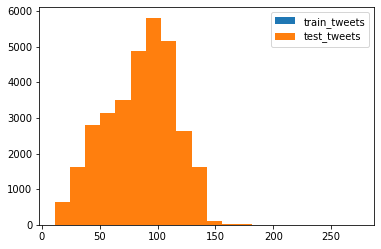

In [ ]:
#check distribution of length of the tweets,in terms of words,in both train and test data
length_train=train['tweet'].str.len()
length_test=train['tweet'].str.len()
plt.hist(length_train,bins=20,label='train_tweets')
plt.hist(length_test,bins=20,label='test_tweets')
plt.legend()
plt.show()

In [ ]:
####data cleaning
#combine both datasets
combi=train.append(test,ignore_index=True)
combi.shape

(49159, 3)

In [ ]:
#user-defined function to remove unwanted text patterns from the tweets
def remove_pattern(input_txt,pattern):
    r=re.findall(pattern,input_txt)
    for i in r:
      input_txt=re.sub(i,'',input_txt)
    return input_txt

In [ ]:
#1.removing twitter handles(@user)
combi['tidy_tweet']=np.vectorize(remove_pattern)(combi['tweet'], "@[\w]*")
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


In [ ]:
#2.removing punctuations,numbers, special characters
combi['tidy_tweet']=combi['tidy_tweet'].str.replace("^a-zA-Z#]", " ")
combi.head(10)

<ipython-input-13-95cabc9378b5>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  combi['tidy_tweet']=combi['tidy_tweet'].str.replace("^a-zA-Z#]", " ")


,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation
5,6,0.0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo
6,7,0.0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦,camping tomorrow dannyâ¦
7,8,0.0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0.0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦
9,10,0.0,@user @user welcome here ! i'm it's so #gr8 !,welcome here ! i'm it's so #gr8 !


In [ ]:
#3.removing short words
combi['tidy_tweet']=combi['tidy_tweet'].apply(lambda x:' '.join([w for w in x.split() if len(w)>3]))
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when father dysfunctional selfish drags kids into dysfunction. #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks #lyft credit can't cause they don't offer wheelchair vans pdx. #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model love take with time urð±!!! ðððð ð¦ð¦ð¦
4,5,0.0,factsguide: society now #motivation,factsguide: society #motivation


In [ ]:
#4.text normalization
tokenized_tweet=combi['tidy_tweet'].apply(lambda x:x.split())
tokenized_tweet.head()

0                                   [when, father, dysfunctional, selfish, drags, kids, into, dysfunction., #run]
1    [thanks, #lyft, credit, can't, cause, they, don't, offer, wheelchair, vans, pdx., #disapointed, #getthanked]
2                                                                                         [bihday, your, majesty]
3                                      [#model, love, take, with, time, urð±!!!, ðððð, ð¦ð¦ð¦]
4                                                                             [factsguide:, society, #motivation]
Name: tidy_tweet, dtype: object

In [ ]:
#normalize tweets
from nltk.stem.porter import*
stemmer=PorterStemmer()
tokenized_tweet=tokenized_tweet.apply(lambda x:[stemmer.stem(i) for i in x])

In [ ]:
#modesdetokenizer function
for i in range(len(tokenized_tweet)):
             tokenized_tweet[i]=' '.join(tokenized_tweet[i])
combi['tidy_tweet'] = tokenized_tweet

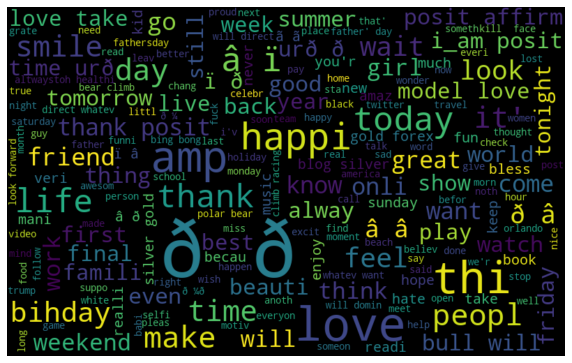

In [ ]:
####story generation and visualization from tweets
#understanding the common words used in the tweets:wordCloud
all_words=' '.join([text for text in combi['tidy_tweet']]) 
from wordcloud import WordCloud
wordcloud=WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
####bag-of-words features
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer 
import gensim

bow_vectorizer=CountVectorizer(max_df=0.90,min_df=2,max_features=1000,stop_words='english')
bow=bow_vectorizer.fit_transform(combi['tidy_tweet'])
bow.shape

(49159, 1000)

In [ ]:
####logistic regression
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score


In [ ]:

#fit the logisticregression model on the bag_of_words features
train_bow=bow[:31962,:]
test_bow=bow[31962:,:]
xtrain_bow,xvalid_bow,ytrain,yvalid=train_test_split(train_bow,train['label'],random_state=42,test_size=0.3)

lreg=LogisticRegression()
lreg.fit(xtrain_bow,ytrain)
prediction=lreg.predict_proba(xvalid_bow)
prediction_int=prediction[:,1]>=0.3
prediction_int=prediction_int.astype(np.int)
f1_score(yvalid,prediction_int)



0.5499181669394435

In [ ]:
####support vector machine
from sklearn import svm
svc=svm.SVC(kernel='linear',C=1,probability=True).fit(xtrain_bow,ytrain)
prediction=svc.predict_proba(xvalid_bow)
prediction_int=prediction[:,1]>=0.3
prediction_int=prediction_int.astype(np.int)
f1_score(yvalid,prediction_int)

0.5242896425297893

In [ ]:
test_pred=svc.predict_proba(test_bow)
test_pred_int=test_pred[:,1]>=0.3
test_pred_int=test_pred_int.astype(np.int)
test['label']=test_pred_int
submission=test[['id','label']]
submission.to_csv("sub_svm_bow.csv",index=False)

In [ ]:
####random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
rf=RandomForestClassifier(n_estimators=400,random_state=11).fit(xtrain_bow,ytrain)
prediction=rf.predict(xvalid_bow)
f1_score(yvalid,prediction)


0.5205905205905206

In [ ]:
test_pred=rf.predict(test_bow)
test['label']=test_pred
submission=test[['id','label']]
submission.to_csv('sub_rf_bow.csv',index=False)



In [ ]:
####XGBoost
from xgboost import XGBClassifier
xgb_model=XGBClassifier(max_depth=6,n_estimators=1000).fit(xtrain_bow,ytrain)
prediction=xgb_model.predict(xvalid_bow)
f1_score(yvalid,prediction)

0.5082765335929893

In [ ]:
test_pred=xgb_model.predict(test_bow)
test['label']=test_pred
submission=test[['id','label']]
submission.to_csv('sub_xgb_bow.csv',index=False)
